# 🏡 Linear Regression Architecture Workshop

## Introduction

Welcome to the **Linear Regression Architecture Workshop**.  
This workshop is designed for college-level students learning both:

1. **Univariate Linear Regression** – a foundational algorithm in Machine Learning, focusing on predicting continuous values from a single feature.  
2. **Machine Learning Operations (MLOps)** – design patterns and architectural considerations that make machine learning experiments reproducible, scalable, and production-ready.  

We will use **real-world housing price data** from **California (USA)** and **Ontario (Canada)** as our case study.  
The goal is to not only understand how Linear Regression works, but also how to **design and implement a machine learning project** from sourcing data → building models → structuring code → preparing for deployment.  

The workshop will be completed in **two 2-hour sessions**, with **homework assignments** to be completed before each class.  

---

## Workshop Structure

### 📚 Session 1 – Univariate Linear Regression
- **Lecture focus**: Mathematical intuition, model formulation, gradient descent, cost function, evaluation metrics.  
- **Practical focus**: Implementing Univariate Linear Regression from scratch + using `scikit-learn`.  
- **Homework before class**: Data sourcing (from CSV, APIs, and relational databases).  

### ⚙️ Session 2 – Machine Learning Operations (MLOps)
- **Lecture focus**: Code modularity, reproducibility, experiment tracking, design patterns in ML architecture.  
- **Practical focus**: Architecting the project with pipelines, config management, and modular scripts.  
- **Homework before class**: Refactor previous Linear Regression code into modular, production-ready format.  

---

## Instructions for Students

### 🔹 Before Session 1: Data Sourcing

Your first task is to collect **housing price data** for California and Ontario.  
You must experiment with **at least three different types of data sources**:

1. **CSV Files**  
   - Find open housing datasets (e.g., Kaggle, UCI ML Repository, government portals).  
   - Example: [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).  
   - Save datasets in `data/raw/` folder.  

2. **Web Services (APIs)**  
   - Explore free APIs offering housing, rental, or real-estate data.  
   - Example APIs:  
     - [Zillow (unofficial APIs exist, check docs)]  
     - [Realtor.ca data endpoints]  
     - [City of Toronto Open Data API](https://open.toronto.ca/)  
     - [California State Open Data Portal](https://data.ca.gov/).  
   - Use Python packages like `requests` or `httpx` to fetch data.  
   - Save results into structured JSON or convert to DataFrames.  

3. **Relational Databases**  
   - Connect to a **PostgreSQL** or **MySQL** demo database.  
   - Option 1: Use hosted databases with sample housing/economic data.  
   - Option 2: Load CSVs into a local database (e.g., PostgreSQL with `psql` or SQLite for portability).  
   - Connect from Python using `sqlalchemy` or `psycopg2`.  
   - Run SQL queries to filter/select data.  

💡 **Deliverable before Session 1**:  
- A Jupyter Notebook that loads housing price data from all three sources (CSV, API, Database) and explores it with basic descriptive statistics and plots.  

---

In [18]:
# Install the required packages
%pip install -r requirements.txt

# Import data 
# Data imports from kaggle (https://www.kaggle.com/datasets/lameesmohammad/home-prices-in-canada)
import pandas as pd

file_path = "data/raw/HouseListings-Top45Cities-10292023-kaggle.csv"

df = pd.read_csv(
    file_path,
    encoding="latin1",      
    engine="python",        
    on_bad_lines="warn"     
)

print("Dataset shape:", df.shape)
display(df.head())

Note: you may need to restart the kernel to use updated packages.
Dataset shape: (35768, 10)



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


,City,Price,Address,Number_Beds,Number_Baths,Province,Population,Latitude,Longitude,Median_Family_Income
0,Toronto,779900.0,#318 -20 SOUTHPORT ST,3,2,Ontario,5647656,43.7417,-79.3733,97000.0
1,Toronto,799999.0,#818 -60 SOUTHPORT ST,3,1,Ontario,5647656,43.7417,-79.3733,97000.0
2,Toronto,799900.0,#714 -859 THE QUEENSWAY,2,2,Ontario,5647656,43.7417,-79.3733,97000.0
3,Toronto,1200000.0,275 MORTIMER AVE,4,2,Ontario,5647656,43.7417,-79.3733,97000.0
4,Toronto,668800.0,#420 -388 RICHMOND ST,1,1,Ontario,5647656,43.7417,-79.3733,97000.0


### 🔹 During Session 1: Univariate Linear Regression Experiment

1. **Define the Problem**  
   - Select one feature (e.g., median income, number of rooms, lot size) to predict housing price.  

2. **Preprocess Data**  
   - Handle missing values.  
   - Normalize/standardize features.  
   - Split data into **train/test sets**.  

3. **Model Implementation**  
   - Implement Linear Regression **from scratch**:  
     - Hypothesis function $ h_\theta(x) = \theta_0 + \theta_1 x $  
     - Cost function (MSE)  
     - Gradient descent update rule  
   - Implement Linear Regression **using scikit-learn** for comparison.  

4. **Model Evaluation**  
   - Compute RMSE, MAE, and $ R^2 $ score.  
   - Visualize regression line vs. data points.  

💡 **Deliverable during Session 1**:  
- A working notebook with both a manual and `scikit-learn` Linear Regression implementation.  

---

# Feature Selection

AveRooms was selected as the independent variable and MedHouseVal as the dependent variable.
The number of rooms is a fundamental housing characteristic with a clear and interpretable relationship to price. Using this feature supports the assumptions of univariate linear regression and keeps the model simple and easy to explain.

# Preprocess Data

In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 1) Define independent and dependent variables
independent_variable = "Number_Beds"
dependent_variable = "Price"

data = df[[independent_variable, dependent_variable]].copy()

# 2) Handle missing values
data[independent_variable] = pd.to_numeric(
    data[independent_variable], errors="coerce"
)
data[dependent_variable] = pd.to_numeric(
    data[dependent_variable], errors="coerce"
)

data = data.dropna()

# remove invalid values
data = data[
    (data[independent_variable] > 0) &
    (data[dependent_variable] > 0)
]

# 3) Split into X and y
X = data[[independent_variable]].values
y = data[dependent_variable].values

# 4) Train / test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5) Normalize / standardize feature
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Cleaned rows:", len(data))
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Cleaned rows: 34999
Train shape: (27999, 1)
Test shape: (7000, 1)


In [20]:
# Import processed data into processed folder
import os

# Create processed directory if it does not exist
processed_dir = "data/processed"
os.makedirs(processed_dir, exist_ok=True)

# Save preprocessed data
processed_file_path = os.path.join(processed_dir, "housing_processed.csv")
data.to_csv(processed_file_path, index=False)

print(f"Preprocessed data saved to: {processed_file_path}")

Preprocessed data saved to: data/processed\housing_processed.csv


# Model Implementation

In [21]:
# From-scratch Implementation (Gradient Descent)
import numpy as np

def train_linear_regression_gd(
    X_train_scaled,
    y_train,
    learning_rate=0.05,
    epochs=3000
):
    """
    Train a univariate linear regression model using gradient descent.

    Hypothesis:
        h(x) = theta0 + theta1 * x
    """
    x = X_train_scaled[:, 0]
    n = len(y_train)

    theta0 = 0.0  # intercept
    theta1 = 0.0  # slope
    loss_history = []

    for _ in range(epochs):
        # Predictions
        y_pred = theta0 + theta1 * x

        # Errors
        error = y_pred - y_train

        # Gradients (MSE)
        d_theta0 = (2 / n) * np.sum(error)
        d_theta1 = (2 / n) * np.sum(error * x)

        # Parameter update
        theta0 -= learning_rate * d_theta0
        theta1 -= learning_rate * d_theta1

        # Store training loss
        loss_history.append(np.mean(error ** 2))

    return theta0, theta1, loss_history


def predict_linear_regression(theta0, theta1, X_scaled):
    """
    Make predictions using a trained univariate linear regression model.
    """
    x = X_scaled[:, 0]
    return theta0 + theta1 * x


# Train the model
theta0, theta1, loss_history = train_linear_regression_gd(
    X_train_scaled, y_train
)

# Predict on test set
y_pred_gd = predict_linear_regression(
    theta0, theta1, X_test_scaled
)

print("From-scratch model parameters:")
print("Intercept (theta0):", theta0)
print("Slope (theta1):", theta1)
print("Final training MSE:", loss_history[-1])

From-scratch model parameters:
Intercept (theta0): 953182.9158641376
Slope (theta1): 339352.76904259314
Final training MSE: 978625616878.4708


In [22]:
# scikit-learn Baseline Implementation
from sklearn.linear_model import LinearRegression

# Train scikit-learn model
sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_sk = sk_model.predict(X_test_scaled)

print("scikit-learn model parameters:")
print("Intercept:", sk_model.intercept_)
print("Coefficient:", sk_model.coef_[0])

scikit-learn model parameters:
Intercept: 953182.9158641379
Coefficient: 339352.76904261747


# Model Evaluation

In [23]:
# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_model(model_name, y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"--- {model_name} ---")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"R^2 : {r2:.4f}\n")

# Evaluate both models
evaluate_model("From-scratch (Gradient Descent)", y_test, y_pred_gd)
evaluate_model("scikit-learn Baseline", y_test, y_pred_sk)

--- From-scratch (Gradient Descent) ---
RMSE: 834187.24
MAE : 476968.23
R^2 : 0.1462

--- scikit-learn Baseline ---
RMSE: 834187.24
MAE : 476968.23
R^2 : 0.1462



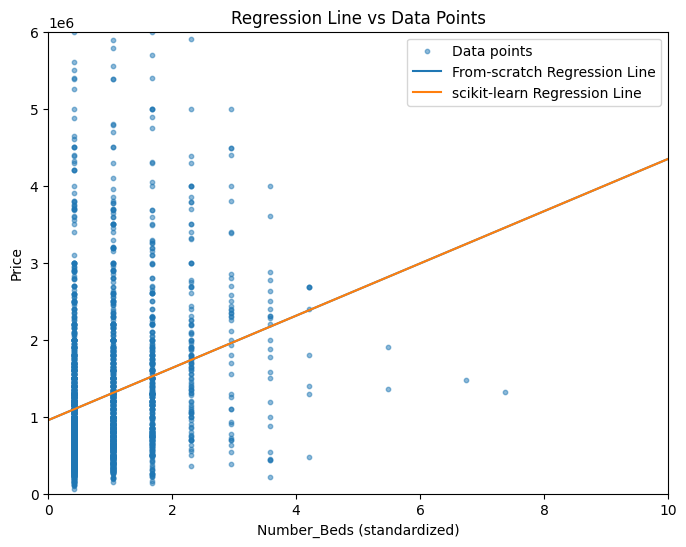

In [29]:
# Visualization of Results
import matplotlib.pyplot as plt
import numpy as np

# Order by X values for smooth regression lines
order = np.argsort(X_test_scaled[:, 0])
x_sorted = X_test_scaled[order, 0]

y_line_gd = y_pred_gd[order]
y_line_sk = y_pred_sk[order]

plt.figure(figsize=(8, 6))

# Scatter plot of test data
plt.scatter(
    X_test_scaled[:, 0],
    y_test,
    s=10,
    alpha=0.5,
    label="Data points"
)

# Regression lines
plt.plot(x_sorted, y_line_gd, label="From-scratch Regression Line")
plt.plot(x_sorted, y_line_sk, label="scikit-learn Regression Line")

# Axis limits
plt.xlim(0, 10)
plt.ylim(0, 6000000)

# Labels and title
plt.xlabel(f"{independent_variable} (standardized)")
plt.ylabel(dependent_variable)
plt.title("Regression Line vs Data Points")
plt.legend()

plt.show()

### 🔹 After Session 1 (Homework)

- Refactor your notebook into **modular Python scripts**:  
  - `data_loader.py` – functions to load data from CSV, API, and DB.  
  - `preprocessing.py` – cleaning, normalization, train/test split.  
  - `model.py` – regression model implementations.  
  - `evaluation.py` – metrics, plots, reporting.  
- Ensure each module can run independently.  

💡 This will prepare you for **Session 2 (MLOps)**.  

---

### 🔹 Before Session 2: Preparing for MLOps

- Replicate the structure, files and resources that you developed during the **DataStreamVisualization_Workshop**
- Use it to organize this project into a folder structure like:

```txt
linear_regression_project/
│── data/
│   ├── raw/
│   ├── processed/
│── notebooks/
│   ├── EDA.ipynb
│   ├── linear_regression.ipynb
│── src/
│   ├── data_loader.py
│   ├── preprocessing.py
│   ├── model.py
│   ├── evaluation.py
│── configs/
│   ├── experiment_config.yaml
│── experiments/
│   ├── results.csv
│── requirements.txt
│── README.md
````

* Create a **YAML config file** with parameters:

  * Data source path/API endpoint/DB connection string
  * Learning rate, iterations, train/test split ratio
  * Feature to use as predictor

* Document how to run your scripts step-by-step.

---

### 🔹 During Session 2: MLOps Architecture

* Apply the **Robot PM MLOps design patterns**:

  * **Separation of concerns**: Each module is independent.
  * **Configuration-driven**: Experiments are parameterized by configs, not hard-coded values.
  * **Experiment tracking**: Save model performance metrics in `experiments/results.csv`.
  * **Reproducibility**: Ensure anyone can re-run your experiment with the same results.

* Discuss:

  * Why modularity matters for ML projects.
  * How config management avoids errors in scaling ML experiments.
  * How this workflow connects to real-world ML pipelines.

💡 **Deliverable during Session 2**:

* A structured project with modular code, configs, and experiment tracking.

---

### 🔹 After Session 2: Extension & Homework

0. **Submission Format**  
   - This activity is **to be submitted individually**. Each student must create and manage their own project repository.

1. **Workshop Replication**  
   - This workshop is modeled on the structure, files, and resources used in the **DataStreamVisualization_Workshop**.  
   - Your submission must replicate this style of organization and completeness.  

2. **Repository Submission Instructions**  
   - Create a **remote Git repository** named:  
     ```
     LinearRegressionArchitecture_Workshop
     ```
   - Once your repository is ready, send your instructor an email with the subject line:  
     ```
     Linear Regression Architecture Workshop
     ```
   - In the body of the email, paste the **full URL of your repository**, making sure it ends with the `.git` extension.  
     - ✅ Correct example: `https://github.com/username/LinearRegressionArchitecture_Workshop.git`  
     - ❌ Incorrect example: `https://github.com/username/LinearRegressionArchitecture_Workshop`

3. **Repository Requirements**  
   Your repository must contain:  
   - A **frozen version of the codebase** (no further modifications after submission).  
   - A `requirements.txt` file that lists all dependencies required to run your project.  
   - A `README.md` file that:  
     - Displays the title: **Linear Regression Architecture Workshop**.  
     - Describes the work completed in the workshop.  
     - Summarizes key design decisions.  

4. **Notebook Updates (RobotPM_MLOps.ipynb)**  
   - Open the notebook `RobotPM_MLOps.ipynb`.  
   - Update it so that it highlights all changes made to the original project architecture and files.  
   - Specifically, reference the lists provided in the notebook:  
     - **Recommended Additions**  
     - **Recommended Enhancements**  
     - **Breakdown examples** (from both design breakdown sections).  

5. **Expectations for Notebook Updates**  
   - You are **not required to fully implement** the changes and updates at this stage.  
   - Instead, create all **placeholders, stubs, and structure** needed to prepare the project for a future code review.  
   - Think of this as **project scaffolding** for the upcoming implementation sprint cycle, which will be executed in a future project.  

💡 **Final Deliverable**:  
- A complete GitHub repository named `LinearRegressionArchitecture_Workshop` with the required structure, files, and documentation.  
- An updated `RobotPM_MLOps.ipynb` notebook showing how the project architecture was extended and prepared for enhancements.  
- Email submission to the instructor containing the `.git` repository URL.  
